<h1><center>PHYS-F-302</center></h1>
<h1><center>Partie numérique</center></h1>
<h2><center>Cédric SCHOONEN, Maxime JAMOTTE</center></h2>

## Justification physique des conditions aux bords

Notre système est délimité par un côté mobile, se déplaçant à une vitesse de $1$ m/s, et trois autres immobiles. Selon l'énoncé du problème, les dérivées de la stream function sont nulles sur ces derniers $(\frac{\partial \psi }{\partial x} = \frac{\partial \psi }{\partial y} = 0 )$ et $\frac{\partial \psi }{\partial y}$ vaut 1 m/s le long du côté mobile. 

Premièrement, visualisons microscopiquement ce qui se déroule à proximité des parois, tant bien auprès de celles immobiles qu'en mouvement. Nos particules du fluide vont interagir non seulement entre elles mais également avec les bords, et ce de moins en moins intensément au fur et à mesure qu'elles sont éloignées de ceux-ci. Dans notre problème, nous réduisons l'interaction fluide-bord à la première couche de particules. Nous justifions les valeurs des dérivées dans les directions tangentielles aux parois par un argument de non glissement des particules sur les bords. Par les interactions existant entre les parois et les particules, les plus proches des bords parmi ces dernières vont rester fixes par rapport aux parois. Ceci implique en effet que la composante tangentielle de la vitesse de la stream function sur le bord mobile vaut 1 tandis que celle sur les autres bords vaut 0.

Ensuite, nous considérons nos parois imperméables, ce qui nous donne des vitesses dans les directions normales à la paroi nulles également. Ceci implique que la stream function est constante le long des parois immobiles. Puisque cette fonction est un potentiel défini à une constante près, nous pouvons décider qu'elle soit nulle sur un des bords . Par cntinuité, elle devra être nulle sur tous les bords. 

De ceci, nous vérifions que les conditions aux bords qui ont été choisies correspondent à la situation physique décrite.

## Discrétisation de l'opérateur bilaplacien

Le bilaplacien de $\psi$ à discrétiser s'écrit comme $\Delta^2\psi = \partial_{xxxx}\psi + 2\partial_{xxyy}\psi + \partial_{yyyy}\psi$ en supposant $\psi$ suffisamment régulière.

Nous pouvons exprimer les dérivées d'ordre 2 et 4 dans les directions $x,y$ de la façon suivante:

$$ \partial_{xx}\psi_{i,j} = \frac{ \psi_{i,j+1} -2 \psi_{i,j} + \psi_{i,j-1} }{ (dx)^2 } + \cal O((dx)^2) $$

$$ \partial_{yy}\psi_{i,j} = \frac{ \psi_{i-1,j} -2 \psi_{i,j} + \psi_{i+1,j} }{ (dy)^2 } + \cal O((dy)^2) $$

$$ \partial_{xxxx}\psi_{i,j} = \frac{ \psi_{i,j+2} -4 \psi_{i,j+1} +6 \psi_{i,j} -4\psi_{i,j-1} + \psi_{i,j-2} }{ (dx)^4 } + \cal O((dx)^2) $$

$$ \partial_{yyyy}\psi_{i,j} = \frac{ \psi_{i-2,j} -4 \psi_{i-1,j} +6 \psi_{i,j} -4\psi_{i+1,j} + \psi_{i+2,j} }{ (dy)^4 } + \cal O((dy)^2) $$

Les discrétisations des dérivées secondes sont utiles pour trouver celle de la dérivée croisée $\partial_{xxyy}\psi$:

$$ \partial_{xxyy}\psi_{i,j} = \frac{ \partial_{yy}\psi_{i,j+1} -2 \partial_{yy}\psi_{i,j} + \partial_{yy}\psi_{i,j-1} }{ (dx)^2 } + \cal O((dx)^2) $$

En remplaçant, cela donne

$$ \partial_{xxyy}\psi_{i,j} = \frac{ \frac{\psi_{i-1,j+1} -2 \psi_{i,j+1} + \psi_{i+1,j+1}}{(dy)^2} + \cal O((dy)^2)
                                    -2\frac{\psi_{i-1,j  } -2 \psi_{i,j  } + \psi_{i+1,j  }}{(dy)^2} + \cal O((dy)^2)
                                    + \frac{\psi_{i-1,j-1} -2 \psi_{i,j-1} + \psi_{i+1,j-1}}{(dy)^2} + \cal O((dy)^2)
                                    }{(dx)^2} + \cal O((dx)^2) $$
$$ \partial_{xxyy}\psi_{i,j} = \frac{\psi_{i-1,j+1}  -2 \psi_{i,j+1} +  \psi_{i+1,j+1}
                                     -2 \psi_{i-1,j} +4 \psi_{i-1,j} -2 \psi_{i+1,j}
                                     \psi_{i-1,j-1}  -2 \psi_{i,j-1} +  \psi_{i+1,j-1}
                                     }{(dx)^2(dy)^2} + \cal O((dx)^2) + \cal O((dy)^2) + \cal O\left(\frac{(dx)^4}{(dy)^2}\right) $$       
                                     
Les coefficients sont plus facilement visualisés dans le tableau suivant:

|     || j-1 |  j  | j+1 |
|-----||-----|-----|-----|
| i-1 ||  1  | -2  |  1  |
|  i  || -2  |  4  | -2  |
| i+1 ||  1  | -2  |  1  |

Notons qu'il est laborieux de montrer que les termes en $\cal O((dx)^2)$ du numérateur se simplifient pour donner une erreur en $\cal O\left(\frac{(dx)^4}{(dy)^2}\right)$. De plus, cette preuve nous semble dénuée d'intérêt pour le sujet c'est pourquoi nous ne l'écrirons pas ici. Cependant, l'ayant faite, nous sommes interrogeables sur le sujet.

Les coefficients pour le bilaplacien se résument donc *dans le cas où $dx$ = $dy$* par:

|     || j-2 | j-1 |  j  | j+1 | j+2 |
|-----||-----|-----|-----|-----|-----|
| i-2 ||     |     |  1  |     |     |
| i-1 ||     |  2  | -8  |  2  |     |
|  i  ||  1  | -8  | 20  | -8  |  1  |
| i+1 ||     |  2  | -8  |  2  |     |
| i+2 ||     |     |  1  |     |     |

## Discrétisation des conditions aux bords

Nous avons deux conditions aux bords à discrétiser. La première est $\psi = 0$, que nous implémentons de manière évidente et correcte à tous les ordres comme 

$$\psi_{i,0} = \psi_{i,N-1} = \psi_{0,j} = \psi_{N-1,j} = 0 \quad \forall i,j=0,...,N-1$$

La deuxième condition aux bords est portée sur les dérivées de $\psi$ et prend des expressions diférentes suivant le bord en question. La condition sur le bord situé en $x=0$ est $\partial_x\psi = 0$. Nous la discrétisons en considérant une approximation à l'ordre 1 de type forward de la dérivée en $x=0$:

$$ 0 = \partial_x\psi_{i,0} = \frac{-\psi_{i,0} + \psi_{i,1}}{dx} + \mathcal O(dx) $$
$$ \psi_{i,1} = \psi_{i,0} + dx\, \mathcal O(dx) = 0 + \mathcal O((dx)^2)$$

Nous voyons que cela revient à considérer $\psi_{i,1} = 0$ en commettant une erreur d'ordre 2, qui est bien l'ordre ciblé. Il est facile de voir que ce raisonnement se généralise à tous les côtés. Nous détaillons encore le côté supérieur pour lequel la condition est légèrement différente.

$$ 1 = \partial_y\psi_{N-1,j} = \frac{-\psi_{N-2,j} + \psi_{N-1,j}}{dy} + \mathcal O(dy) $$
$$ \psi_{N-2,j} = \psi_{N-1,j} - dy + dy\, \mathcal O(dy) = -dy + \mathcal O((dy)^2)$$

Nos conditions sur les dérivées se résument donc de la façon suivante:

$$ \psi_{i,1} \ \ \ \, = \ \ \ \ \,   0 + \cal O((dx)^2) $$
$$ \psi_{i,N-2}        = \ \ \ \ \,  0 + \cal O((dx)^2) $$
$$ \psi_{N-2,j}        = \ \ \ \ \,  0 + \cal O((dy)^2) $$
$$ \psi_{N-2,j}        = -dy + \mathcal O((dy)^2) $$

Remarquons que l'imposition des conditions aux bords est incohérentes pour les 2 points $(N-2,1)$ et $(N-2,N-2)$ situés près des coins. En effet, ceux-ci se retrouvent deux fois dans les formules ci-dessus et se voient imposées deux valeurs différentes: $0$ et $-dy$. Ceci amène un choix arbitraire dans notre code concernant la valeur à utiliser. Cependant, ceci n'est pas un problème physique car dans la limite $N\rightarrow \infty$, $-dy\rightarrow 0$ et les deux valeurs coïncident. Il nous a donc semblé plus naturel d'imposer la valeur $0$.

## Implémentation de la méthode du gradient conjugé

In [1]:
import time
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
from matplotlib import pyplot, cm

Nous importons des fonctions prédéfinies dans le mooc pour la méthode du gradient conjugé.

In [2]:
import Conjugate_Gradient as cg

Nous implémentons maintenant le bilaplacien discrétisé plus haut. Comme les conditions aux bords fixent les valeurs pour les deux rangées de points extérieurs, nous ne calculons le bilaplacien que dans un carré centré de taille $(N-4)\times (N-4)$. Les conditions aux bords sont donc automatiquement fixées.

In [3]:
def bilaplacian(p,dx):
        
    N = p.shape[0]
    Ap = numpy.zeros((N,N))
    
    Ap[2:-2,2:-2] = 20*p[2:-2,2:-2]-8*(p[1:-3,2:-2]+p[2:-2,1:-3]+p[2:-2,3:-1]+p[3:-1,2:-2])+\
                    2*(p[1:-3,1:-3]+p[1:-3,3:-1]+p[3:-1,1:-3]+p[3:-1,3:-1])+\
                    1*(p[:-4,2:-2]+p[2:-2,:-4]+p[2:-2,4:]+p[4:,2:-2])
    
    return Ap/dx**4

Nous récupérons et adaptons le code du mooc à notre problème.

In [4]:
def conjugate_gradient_2d(p, b, dx, l1_target):
    '''Performs cg relaxation
    Assumes Dirichlet boundary conditions p=0
    
    Parameters:
    ----------
    p : 2D array of floats
        Initial guess
    b : 2D array of floats
        Source term
    dx: float
        Mesh spacing (same in both directions)
    l1_target: float
        exit criterion
        
    Returns:
    -------
    p: 2D array of float
        Distribution after relaxation
    '''
    N = p.shape[0]
    r  = numpy.zeros((N,N)) # residual
    Ad  = numpy.zeros((N,N)) # to store result of matrix multiplication 
    
    l1_norm = 1
    iterations = 0
    l1_conv = []
    
    # Step-0 We compute the initial residual and 
    # the first search direction is just this residual
    
    r = b-bilaplacian(p,dx)
    d = r.copy()
    rho = numpy.sum(r*r)
    Ad = bilaplacian(d,dx)
    sigma = numpy.sum(d*Ad)
    
    # Iterations
    while l1_norm > l1_target:

        pk = p.copy()
        rk = r.copy()
        dk = d.copy()
        
        alpha = rho/sigma

        p = pk + alpha*dk
        r = rk- alpha*Ad
        
        rhop1 = numpy.sum(r*r)
        beta = rhop1 / rho
        rho = rhop1
        
        d = r + beta*dk
        Ad = bilaplacian(d,dx)
        sigma = numpy.sum(d*Ad)
        
        # BCs are automatically enforced
    
        l1_norm = cg.L1norm(pk,p)
        iterations += 1
        l1_conv.append(l1_norm)
    
    print('Number of CG iterations: {0:d}'.format(iterations))
    return p, l1_conv   

## Calcul de la stream function qui respecte $\Delta^2\psi=0$

Nous utilisons les paramètres (taille de grille, dimensions spatiales, précision désirée) imposées dans l'énoncé. 

In [5]:
N = 41
L = 1
l1_target = 1e-8

dx = L/(N-1)
b = 0

# initialise la stream function avec les bonnes conditions aux bords
p0 = numpy.zeros((N,N))
p0[-2,2:-2] = -dx

In [6]:
p, l1_conv = conjugate_gradient_2d(p0.copy(), b, dx, l1_target)

x = numpy.linspace(0,L,N)
y = numpy.linspace(0,L,N)
pan = cg.p_analytical(x,y)

err_p = cg.L1norm(p,pan)

Number of CG iterations: 650


Nous remarquons que comme énoncé dans la théorie du mooc, la méthode a bien convergé en moins de $N=nx\times ny = 41\times 41 = 1681$ itérations. La matrice semble normale près des bords, comme nous pouvons le constater ci-dessous.

In [7]:
print(p[-5:,:5])

[[ 0.          0.         -0.01032809 -0.02270893 -0.03384594]
 [ 0.          0.         -0.0142063  -0.02680656 -0.03611513]
 [ 0.          0.         -0.02009448 -0.02962738 -0.03483863]
 [ 0.          0.         -0.025      -0.025      -0.025     ]
 [ 0.          0.          0.          0.          0.        ]]


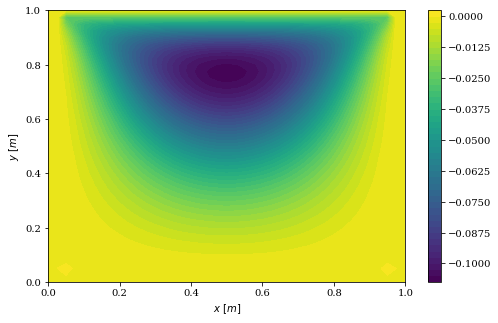

In [8]:
pyplot.figure(figsize=(8,5))
pyplot.contourf(x,y,p,50,cmap=cm.viridis)
pyplot.xlabel('$x\ [m]$')
pyplot.ylabel('$y\ [m]$')
pyplot.colorbar();

## Valeurs de la stream function aux positions demandées

Nous commençons par définir une fonction nous permettant d'extraire la valeur de la stream function à partir des coordonnées cartésiennes. Nous extrayons ensuite les valeurs demandées.

In [9]:
def p_at_coordinates(p,x,y):
    
    N = p.shape[0]
    i = int(y*(N-1))
    j = int(x*(N-1))
    
    return p[i,j]

In [10]:
pij = p_at_coordinates(p,0.6,0.2)
print("La valeur en x=0.6 et y=0.2 est:",pij,"1/s")

pij = p_at_coordinates(p,0.6,0.4)
print("La valeur en x=0.6 et y=0.4 est:",pij,"1/s")

pij = p_at_coordinates(p,0.6,0.6)
print("La valeur en x=0.6 et y=0.6 est:",pij,"1/s")

pij = p_at_coordinates(p,0.6,0.8)
print("La valeur en x=0.6 et y=0.8 est:",pij,"1/s")

La valeur en x=0.6 et y=0.2 est: -0.009404269132471282 1/s
La valeur en x=0.6 et y=0.4 est: -0.03639304097455189 1/s
La valeur en x=0.6 et y=0.6 est: -0.07696088947807028 1/s
La valeur en x=0.6 et y=0.8 est: -0.10114910754336577 1/s


## Conclusions

** TODO **